### Feature Selection

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [58]:
df= pd.read_csv('./resources/csv/Algerian_forest_fires_cleaned_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0



1. Drop day, month, year as they are not necessary 
2. FWI ll be our dependent feature, This is the Regression Problem
3. If we use Classes as dependent feature or say output feature then this ll be classififcation problem

In [59]:
df.drop(['day', 'month', 'year'], axis=1, inplace=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [60]:
### Encode classes
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0,1)

In [61]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [62]:
# Divide features into Independent and dependent features
X=df.drop(['FWI'], axis=1)
y=df['FWI']

In [63]:
print(X.head())

   Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  Classes  Region
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4        0       0
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9        0       0
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7        0       0
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7        0       0
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9        0       0


In [64]:
print(y.head())

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64


In [65]:
## Train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)

In [66]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(182, 11) (61, 11) (182,) (61,)


Check for multicollinearity i.e. independent feature should not be much corellated, in such case we can drop one of that feature

<Axes: >

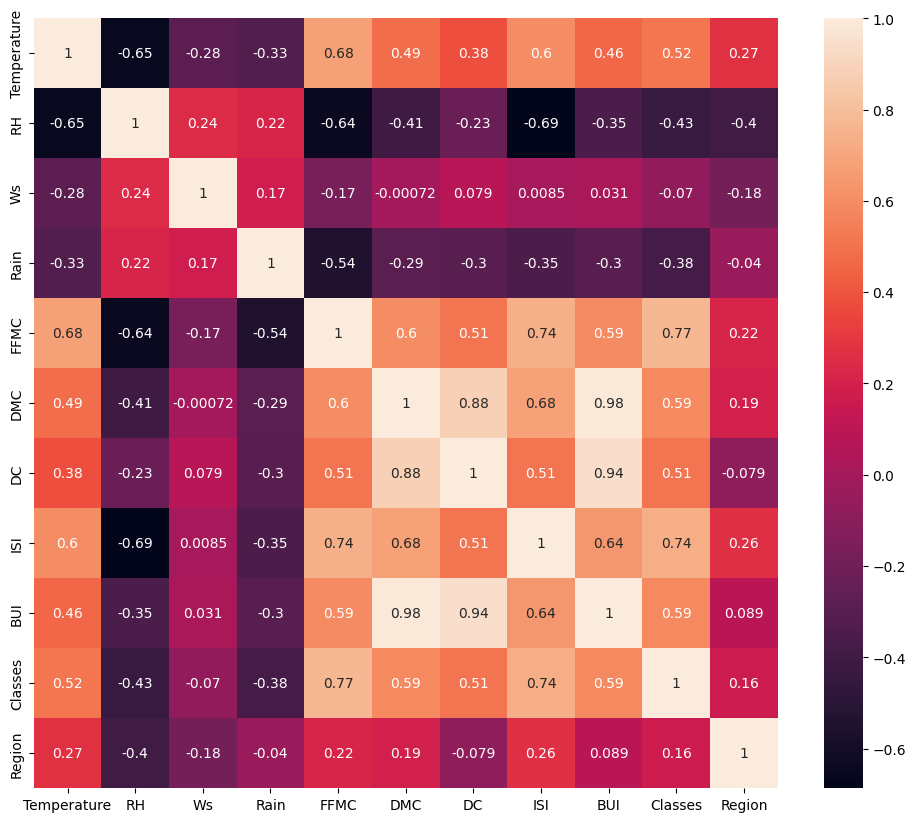

In [67]:
## Step1: check for correlation
plt.subplots(figsize=(12,10))
sns.heatmap(X.corr(), annot=True)

In [68]:
def findHighlyCorrelatedColumns(dataset, threshold):
  col_corr = set()  # Set to hold the correlated columns
  corr_matrix = dataset.corr()  # Calculate the correlation matrix

  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j]) > threshold:  # If the correlation is above the threshold
        colname = corr_matrix.columns[i]  # Get the name of the column
        col_corr.add(colname)  # Add it to the set
  return col_corr

In [69]:
## threshold is basically defined by the domain expert
highlyCorrelatedColumns = findHighlyCorrelatedColumns(X_train,0.85)
highlyCorrelatedColumns

{'BUI', 'DC'}

In [70]:
## As this features are highly correlated we can drop this features
X_train.drop(highlyCorrelatedColumns,axis=1, inplace=True)
X_test.drop(highlyCorrelatedColumns,axis=1, inplace=True)

In [71]:
X_test.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
24,31,64,15,0.0,86.7,14.2,5.7,1,0
6,33,54,13,0.0,88.2,9.9,6.4,1,0
152,28,58,18,2.2,63.7,3.2,1.2,0,1
232,34,58,13,0.2,79.5,18.7,2.1,0,1
238,30,65,14,0.0,85.4,16.0,4.5,1,1


## Feature Scaling / Standadization

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [73]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

Text(0.5, 1.0, 'X train after Scaling')

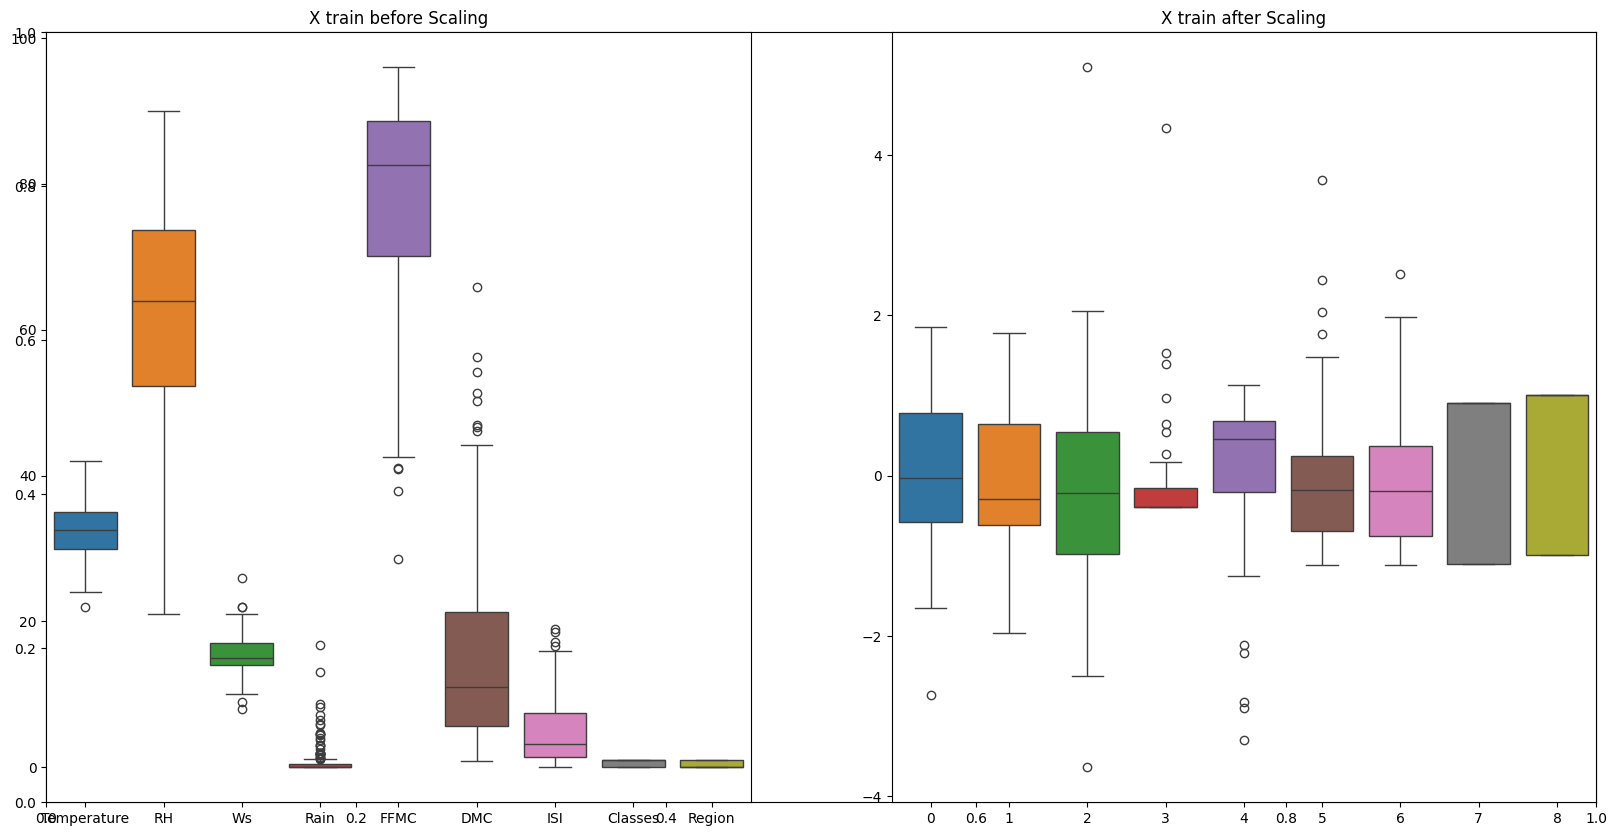

In [100]:
## Box plot to understand Effect of Standardization
plt.subplots(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X train before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_test_scaled)
plt.title('X train after Scaling')

After applyling standardization we can see that all the values are in same scale, and mean is near to 0

## Linear Regression Model

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

linearRegression = LinearRegression()
linearRegression.fit(X_train_scaled,y_train)
y_pred = linearRegression.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2Score= r2_score(y_test,y_pred)

print("Mean absolute Error", mae)
print("R2 score", r2Score)

Mean absolute Error 0.546823646525
R2 score 0.9847657384266951


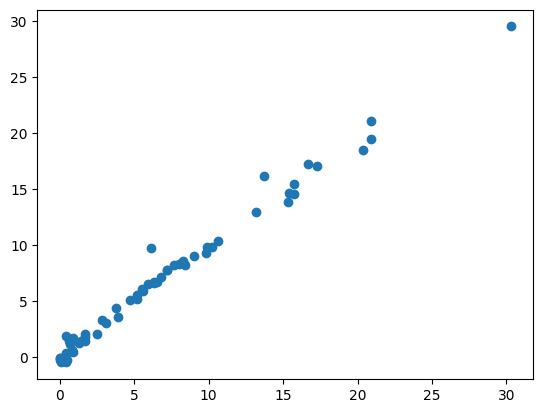

In [103]:
# If we plot a scatter plot graph between y_test, y_pred and if we get a linear realtionship then this means this is a good model
plt.scatter(y_test, y_pred)

##### When we apply Linear Regression, then there is a chance that model might be overfitting, to overcome that we apply the ridge regression or Lasso.

### Lasso Regression

Mean absolute Error 1.133175994914409
R2 score 0.9492020263112388


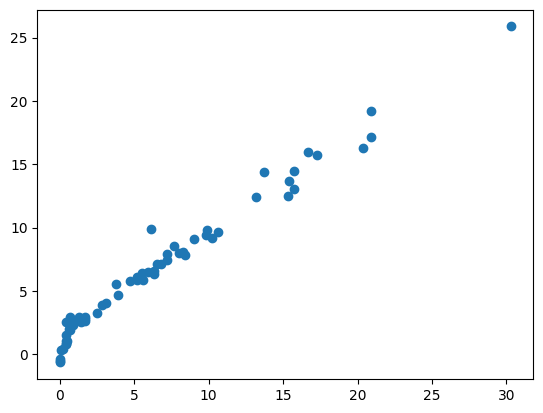

In [105]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2Score= r2_score(y_test,y_pred)

print("Mean absolute Error", mae)
print("R2 score", r2Score)

plt.scatter(y_test, y_pred)

- You'll be able to see that we are getting an R2 score of 0.949 and mean absolute error of 1.13 before the mean absolute error was 0.54.
- But just understand, since the R2 score is reduced, that does not mean that the model is not performing well.
- It may be overfitting. The previous model may be overfitting. We try to fix that particular overfitting itself.


#### Lasso Regression Cross Validation

Mean absolute Error 0.6199701158263435
R2 score 0.9820946715928275


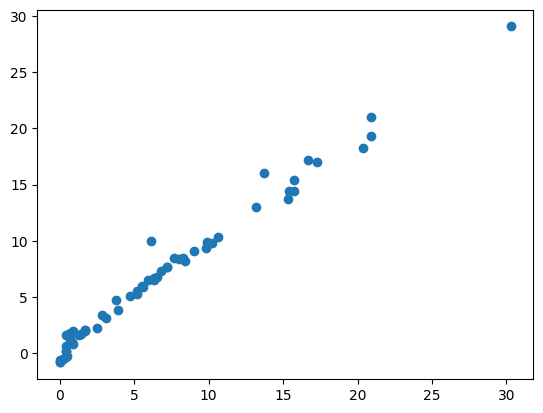

In [113]:
from sklearn.linear_model import LassoCV

lassoCv = LassoCV(cv=5)
lassoCv.fit(X_train_scaled, y_train)

y_pred = lassoCv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2Score= r2_score(y_test,y_pred)

print("Mean absolute Error", mae)
print("R2 score", r2Score)

plt.scatter(y_test, y_pred)


#### Ridge Regression

Mean absolute Error 0.5642305340105713
R2 score 0.9842993364555512


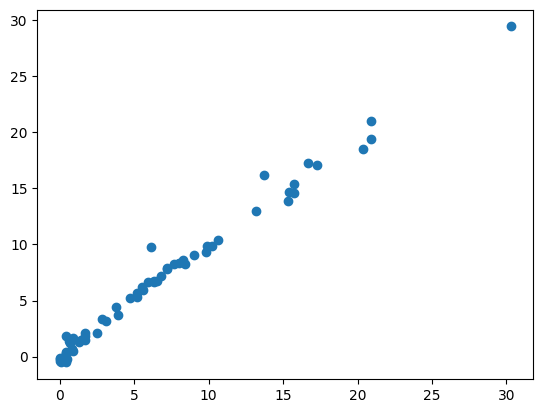

In [106]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2Score= r2_score(y_test,y_pred)

print("Mean absolute Error", mae)
print("R2 score", r2Score)

plt.scatter(y_test, y_pred)

#### Ridge Regression Cross Validation

Mean absolute Error 0.5642305340105713
R2 score 0.9842993364555512


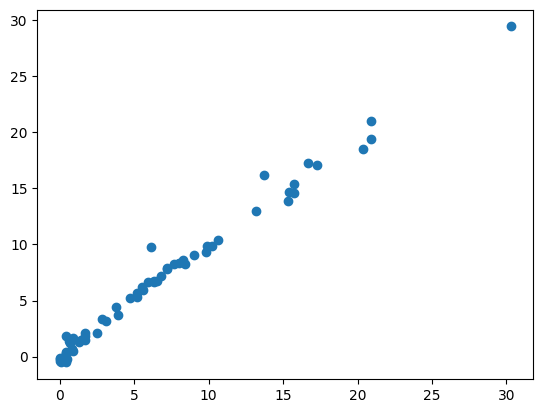

In [114]:
from sklearn.linear_model import RidgeCV

ridgeCv = RidgeCV(cv=5)
ridgeCv.fit(X_train_scaled, y_train)

y_pred = ridgeCv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2Score= r2_score(y_test,y_pred)

print("Mean absolute Error", mae)
print("R2 score", r2Score)

plt.scatter(y_test, y_pred)

### Elastic Net Regression

Mean absolute Error 1.8822353634896
R2 score 0.8753460589519703


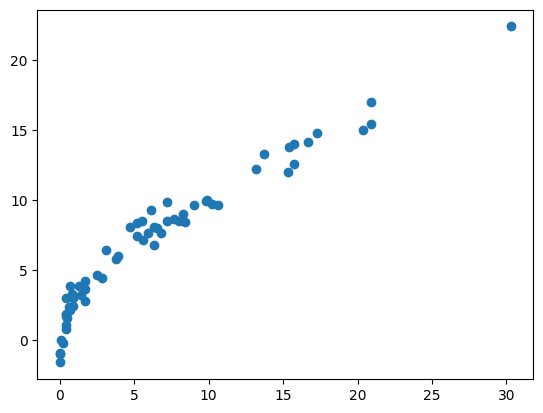

In [107]:
from sklearn.linear_model import ElasticNet

elasticNet = ElasticNet()
elasticNet.fit(X_train_scaled,y_train)
y_pred = elasticNet.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2Score= r2_score(y_test,y_pred)

print("Mean absolute Error", mae)
print("R2 score", r2Score)

plt.scatter(y_test, y_pred)

#### Elastic Net Cross Validation

Mean absolute Error 0.6575946731430904
R2 score 0.9814217587854941


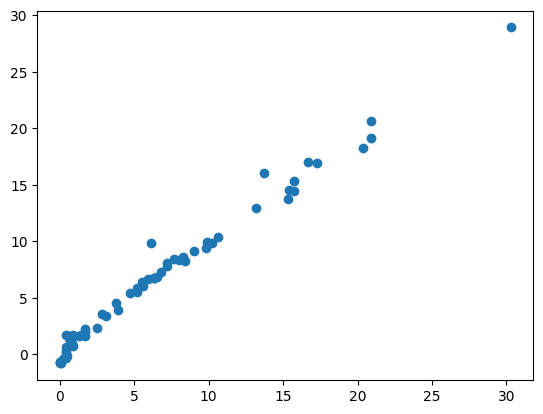

In [115]:
from sklearn.linear_model import ElasticNetCV

elasticNetCv = ElasticNetCV(cv=5)
elasticNetCv.fit(X_train_scaled, y_train)

y_pred = elasticNetCv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2Score= r2_score(y_test,y_pred)

print("Mean absolute Error", mae)
print("R2 score", r2Score)

plt.scatter(y_test, y_pred)